In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
sim = HathorSimulator(block_weight=20.30)

m0 = Miner(hashpower=10000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=1./(30*60), hashpower=10000)
sim.add_tx_generator(g1)

[        0.00] min weight updated: w_blk=22.8850 w_tx=  -inf


In [29]:
sim.run(3600*24*30, report_interval=3600*24)
print(len(sim.blocks), len(sim.transactions))

[ 15553980.40] min weight updated: w_blk=22.8245 w_tx=6.8979
[ 15557823.95] min weight updated: w_blk=22.8245 w_tx=6.6767
[ 15561916.14] min weight updated: w_blk=22.8245 w_tx=6.0013
[ 15565565.57] min weight updated: w_blk=22.8245 w_tx=6.1665
[ 15575113.51] min weight updated: w_blk=22.8245 w_tx=5.3640
[ 15580660.58] min weight updated: w_blk=22.8245 w_tx=6.1475
[ 15586412.42] min weight updated: w_blk=22.8245 w_tx=4.5102
[ 15590783.75] min weight updated: w_blk=22.8245 w_tx=4.9061
[ 15598046.57] min weight updated: w_blk=22.8245 w_tx=5.1737
[ 15602720.83] min weight updated: w_blk=22.8245 w_tx=5.8095
[ 15606366.24] min weight updated: w_blk=22.8245 w_tx=7.1681
[ 15615269.58] min weight updated: w_blk=22.8245 w_tx=4.8799
[ 15620906.09] min weight updated: w_blk=22.8245 w_tx=5.5394
[ 15626277.12] min weight updated: w_blk=22.8245 w_tx=4.6090
[ 15630640.60] min weight updated: w_blk=22.8245 w_tx=4.9087
[ 15639157.42] min weight updated: w_blk=22.8245 w_tx=5.9439
  0.03 [ 15639359.80] bl

[ 16791493.59] min weight updated: w_blk=22.8766 w_tx=5.8920
[ 16798114.74] min weight updated: w_blk=22.8766 w_tx=6.8921
[ 16804905.38] min weight updated: w_blk=22.8766 w_tx=5.2707
[ 16814215.20] min weight updated: w_blk=22.8766 w_tx=5.8155
[ 16818916.92] min weight updated: w_blk=22.8766 w_tx=5.8010
[ 16823115.51] min weight updated: w_blk=22.8766 w_tx=6.5493
[ 16829798.02] min weight updated: w_blk=22.8766 w_tx=7.7533
[ 16835462.91] min weight updated: w_blk=22.8766 w_tx=6.8541
[ 16839450.98] min weight updated: w_blk=22.8766 w_tx=7.3605
[ 16843577.19] min weight updated: w_blk=22.8766 w_tx=4.9894
[ 16847200.57] min weight updated: w_blk=22.8766 w_tx=7.1769
  0.43 [ 16850400.28] blocks=131572 txs=9533 tips=0
[ 16855533.45] min weight updated: w_blk=22.8766 w_tx=5.9754
[ 16862045.44] min weight updated: w_blk=22.8766 w_tx=6.3311
[ 16867912.18] min weight updated: w_blk=22.8766 w_tx=7.0666
[ 16874279.91] min weight updated: w_blk=22.8766 w_tx=5.9484
[ 16878286.93] min weight updated

[ 17719797.34] min weight updated: w_blk=22.8641 w_tx=5.3787
[ 17724777.79] min weight updated: w_blk=22.8641 w_tx=6.3029
[ 17732311.81] min weight updated: w_blk=22.8641 w_tx=6.7058
[ 17741349.15] min weight updated: w_blk=22.8641 w_tx=5.4433
[ 17745134.51] min weight updated: w_blk=22.8641 w_tx=7.6987
[ 17750072.66] min weight updated: w_blk=22.8641 w_tx=6.7302
[ 17755756.50] min weight updated: w_blk=22.8641 w_tx=6.1123
[ 17760890.16] min weight updated: w_blk=22.8641 w_tx=6.2592
[ 17764887.11] min weight updated: w_blk=22.8641 w_tx=6.0353
[ 17772559.77] min weight updated: w_blk=22.8641 w_tx=5.0945
[ 17777906.44] min weight updated: w_blk=22.8641 w_tx=5.6156
[ 17782856.87] min weight updated: w_blk=22.8641 w_tx=6.3116
[ 17786572.65] min weight updated: w_blk=22.8641 w_tx=6.7255
[ 17790201.23] min weight updated: w_blk=22.8641 w_tx=6.1748
[ 17797734.86] min weight updated: w_blk=22.8641 w_tx=5.1209
  0.84 [ 17801803.60] blocks=138979 txs=10057 tips=0
[ 17802629.94] min weight update

In [30]:
print(sim.min_weight_confirmed)

22.8647549368


In [31]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)

In [32]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

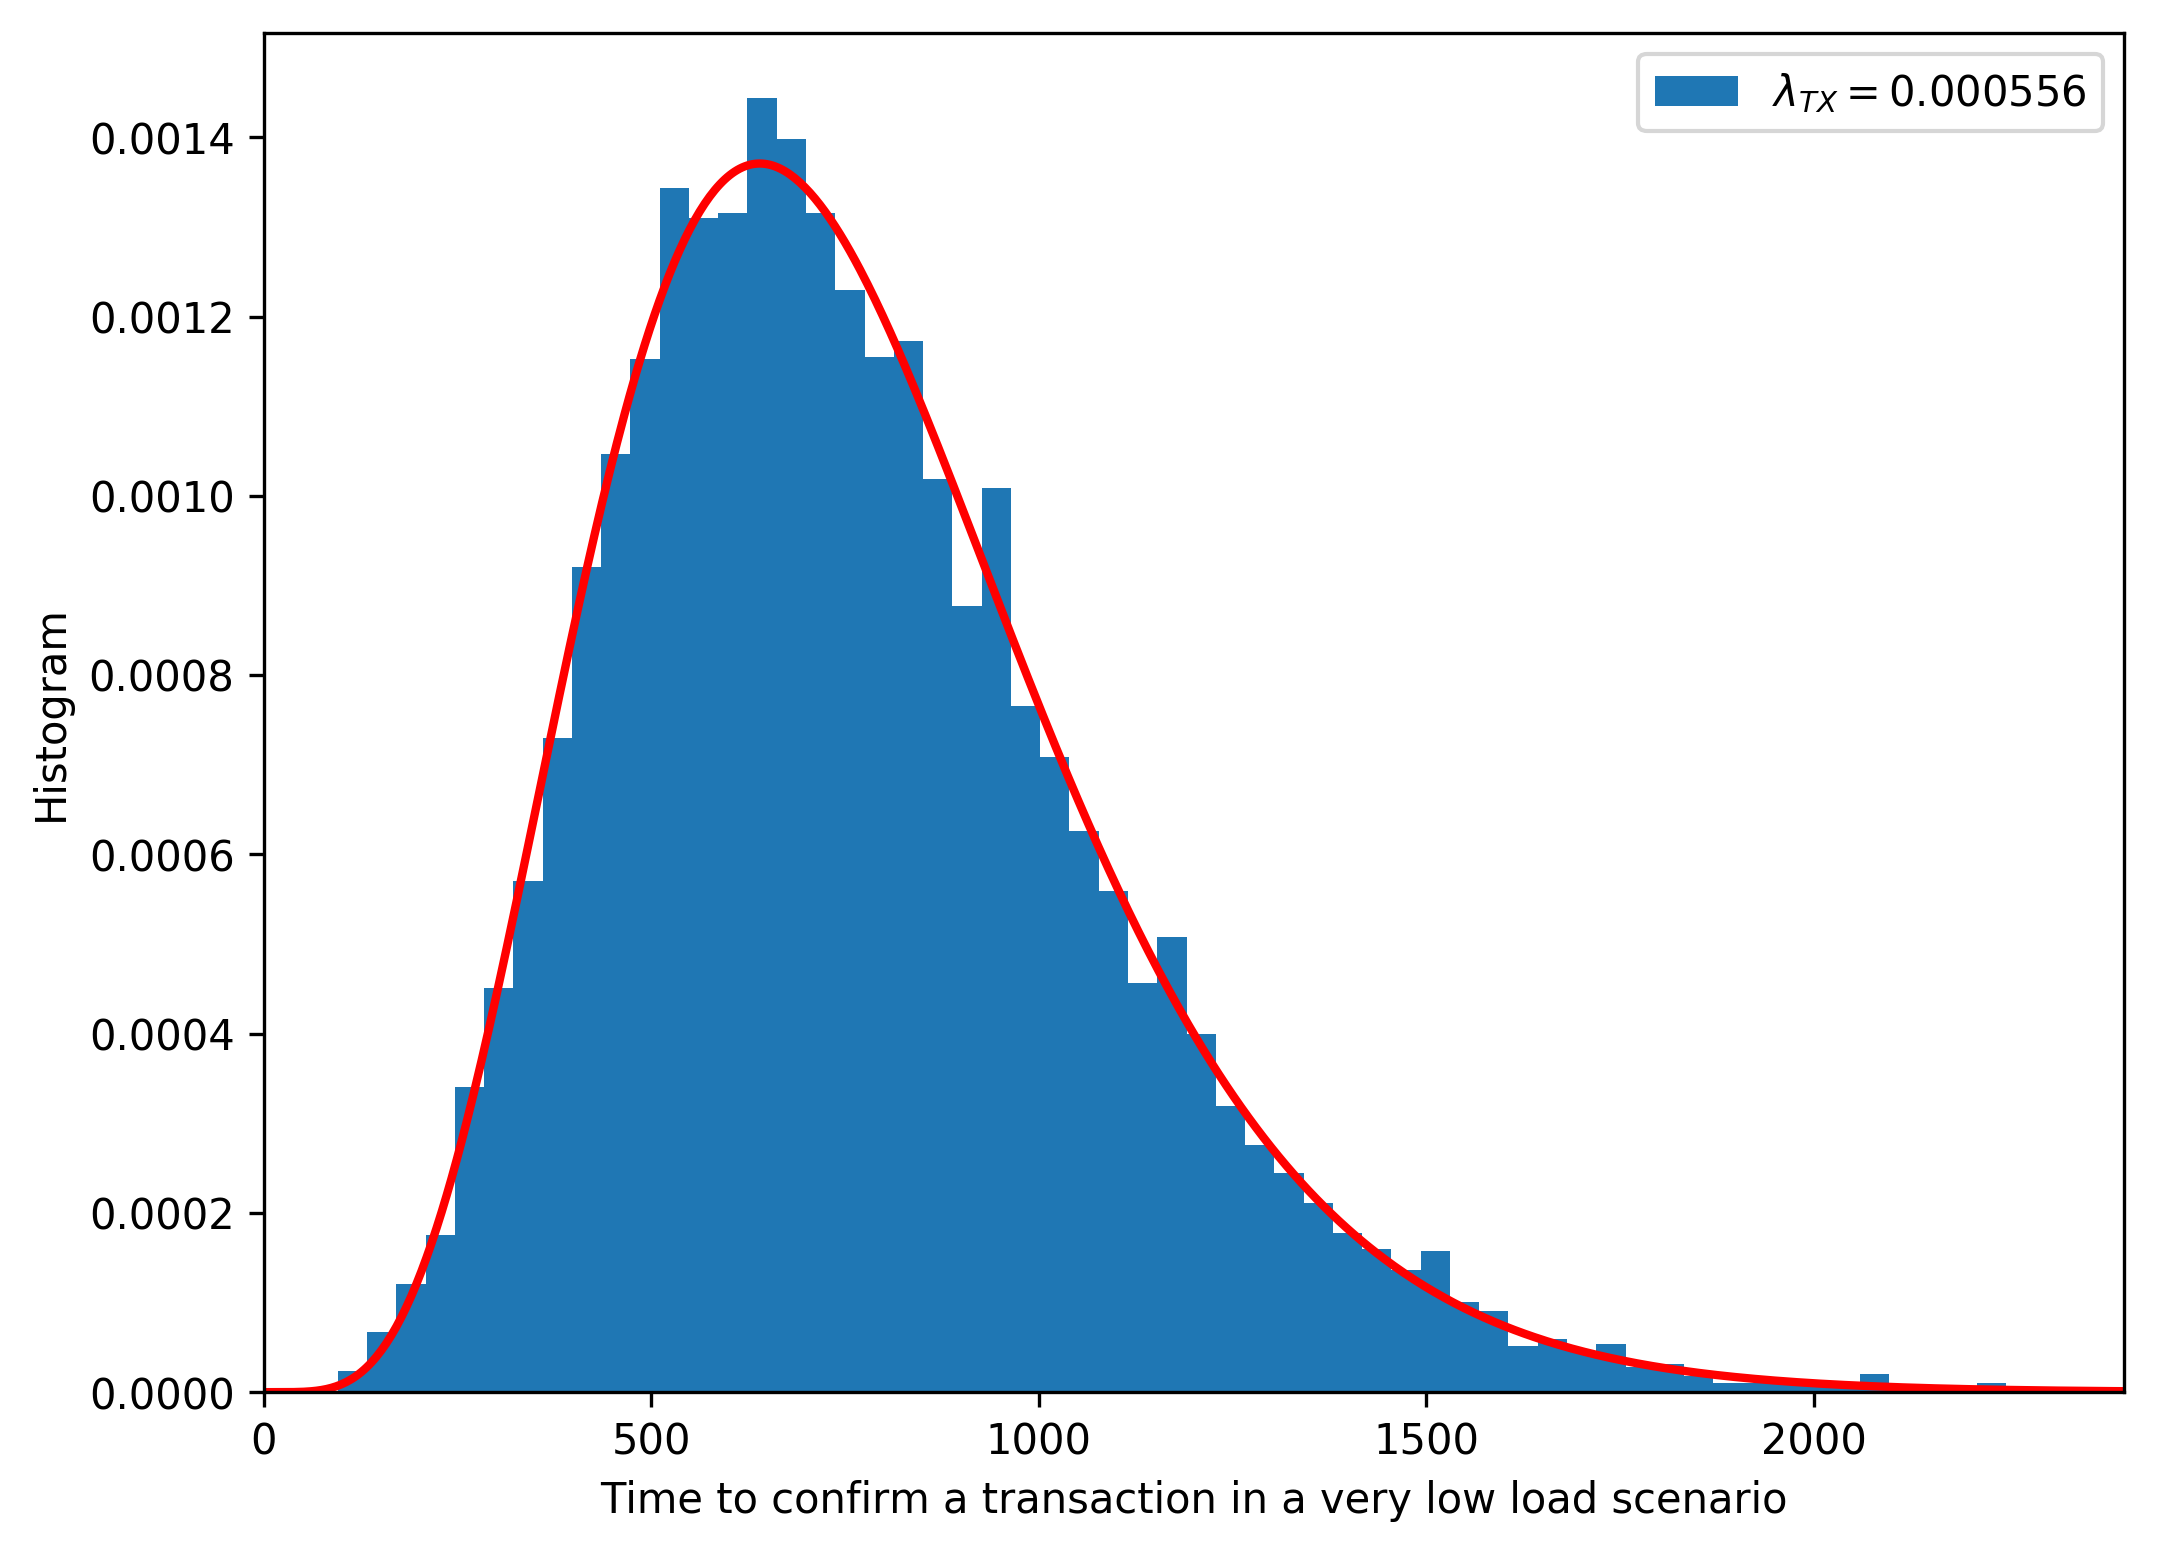

In [34]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd', density=True, label='$\lambda_{{TX}} = {:.6f}$'.format(sim.tx_generators[0].tx_lambda));

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction in a very low load scenario');
plt.xlim(0, 2400)
plt.legend();

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)